## Proje-3 Araç Yakıt Tüketimi *** Veri seti ya da kod hatalı ***

In [1]:
# Kütüphaneler
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# istatistik 
from scipy import stats
from scipy.stats import norm, skew

# Machine Learning
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# veriyi aktaralım
sutun_isimleri = ["hedef", "silindir", "motor_hacmi", "beygir_gucu", "agirlik", "ivme", "model_yil", "mensei", "-"]
veri = pd.read_csv("auto-mpg.data", names = sutun_isimleri, na_values = "?", sep = ",")
veri.head()

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei,-
0,18.0,8,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70.0,1,ford torino


In [3]:
# veri şekli
print("veri şekli : ", veri.shape)

veri şekli :  (398, 9)


In [4]:
# veri bilgisi
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hedef        398 non-null    float64
 1   silindir     398 non-null    int64  
 2   motor_hacmi  398 non-null    float64
 3   beygir_gucu  392 non-null    float64
 4   agirlik      392 non-null    float64
 5   ivme         398 non-null    float64
 6   model_yil    398 non-null    float64
 7   mensei       398 non-null    int64  
 8   -            398 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 28.1+ KB


In [5]:
# temel istatistiksel bilgi
veri.describe()

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei
count,398.000000,398.000000,398.000000,392.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2977.584184,53.035678,75.095226,2.728643
std,7.815984,1.701004,104.269838,38.491160,849.402560,308.689377,8.040681,9.371522
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,14.300000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2225.250000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3614.750000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,3035.000000,82.000000,82.000000


In [6]:
# kayıp veri
print(veri.isna().sum())

hedef          0
silindir       0
motor_hacmi    0
beygir_gucu    6
agirlik        6
ivme           0
model_yil      0
mensei         0
-              0
dtype: int64


In [7]:
# beygir gücü eksiklerini ortalama ile doldur.
veri["beygir_gucu"] = veri["beygir_gucu"].fillna(veri["beygir_gucu"].mean())
print(veri.isna().sum())

hedef          0
silindir       0
motor_hacmi    0
beygir_gucu    0
agirlik        6
ivme           0
model_yil      0
mensei         0
-              0
dtype: int64


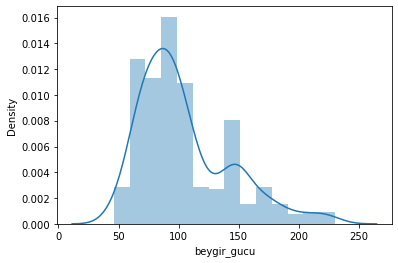

In [8]:
# beygir gücü ortalamasının etkisi
sns.distplot(veri.beygir_gucu)
plt.show()

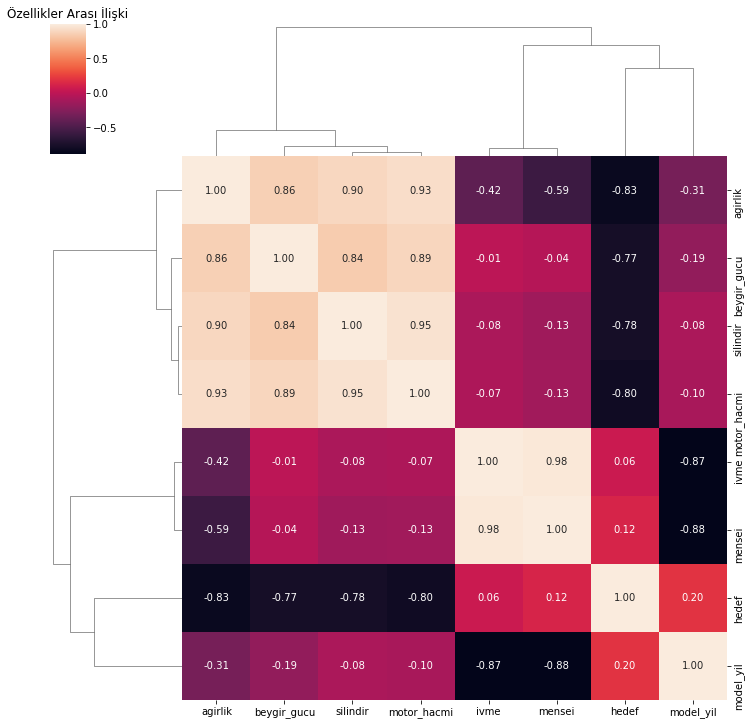

In [9]:
# veri özellikleri arası ilişki
corr_matrix = veri.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Özellikler Arası İlişki")
plt.show()

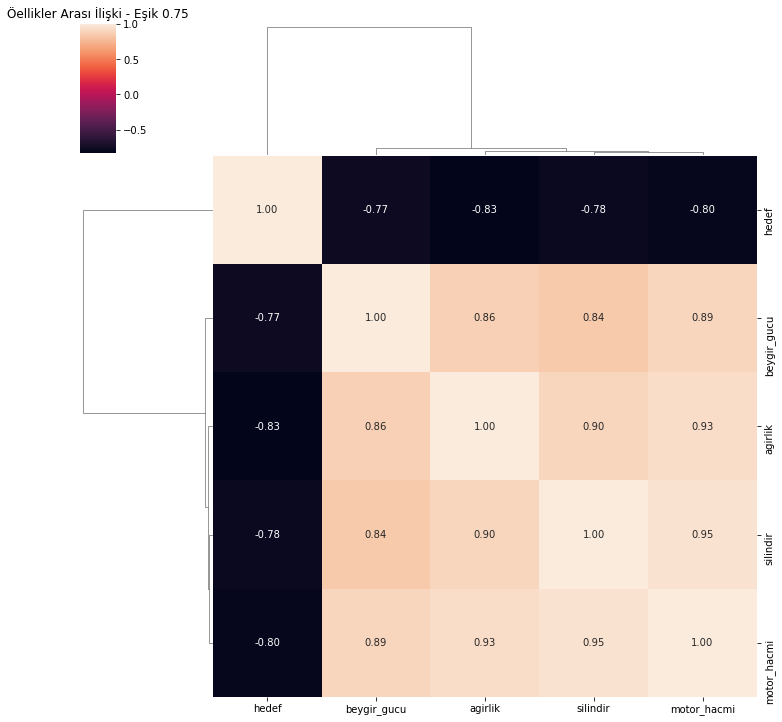

In [10]:
# hedef ile arasındaki ilişki 0.75 den büyük olan özellikler
threshold = 0.75
filtre = np.abs(corr_matrix["hedef"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(veri[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Öellikler Arası İlişki - Eşik 0.75")
plt.show()

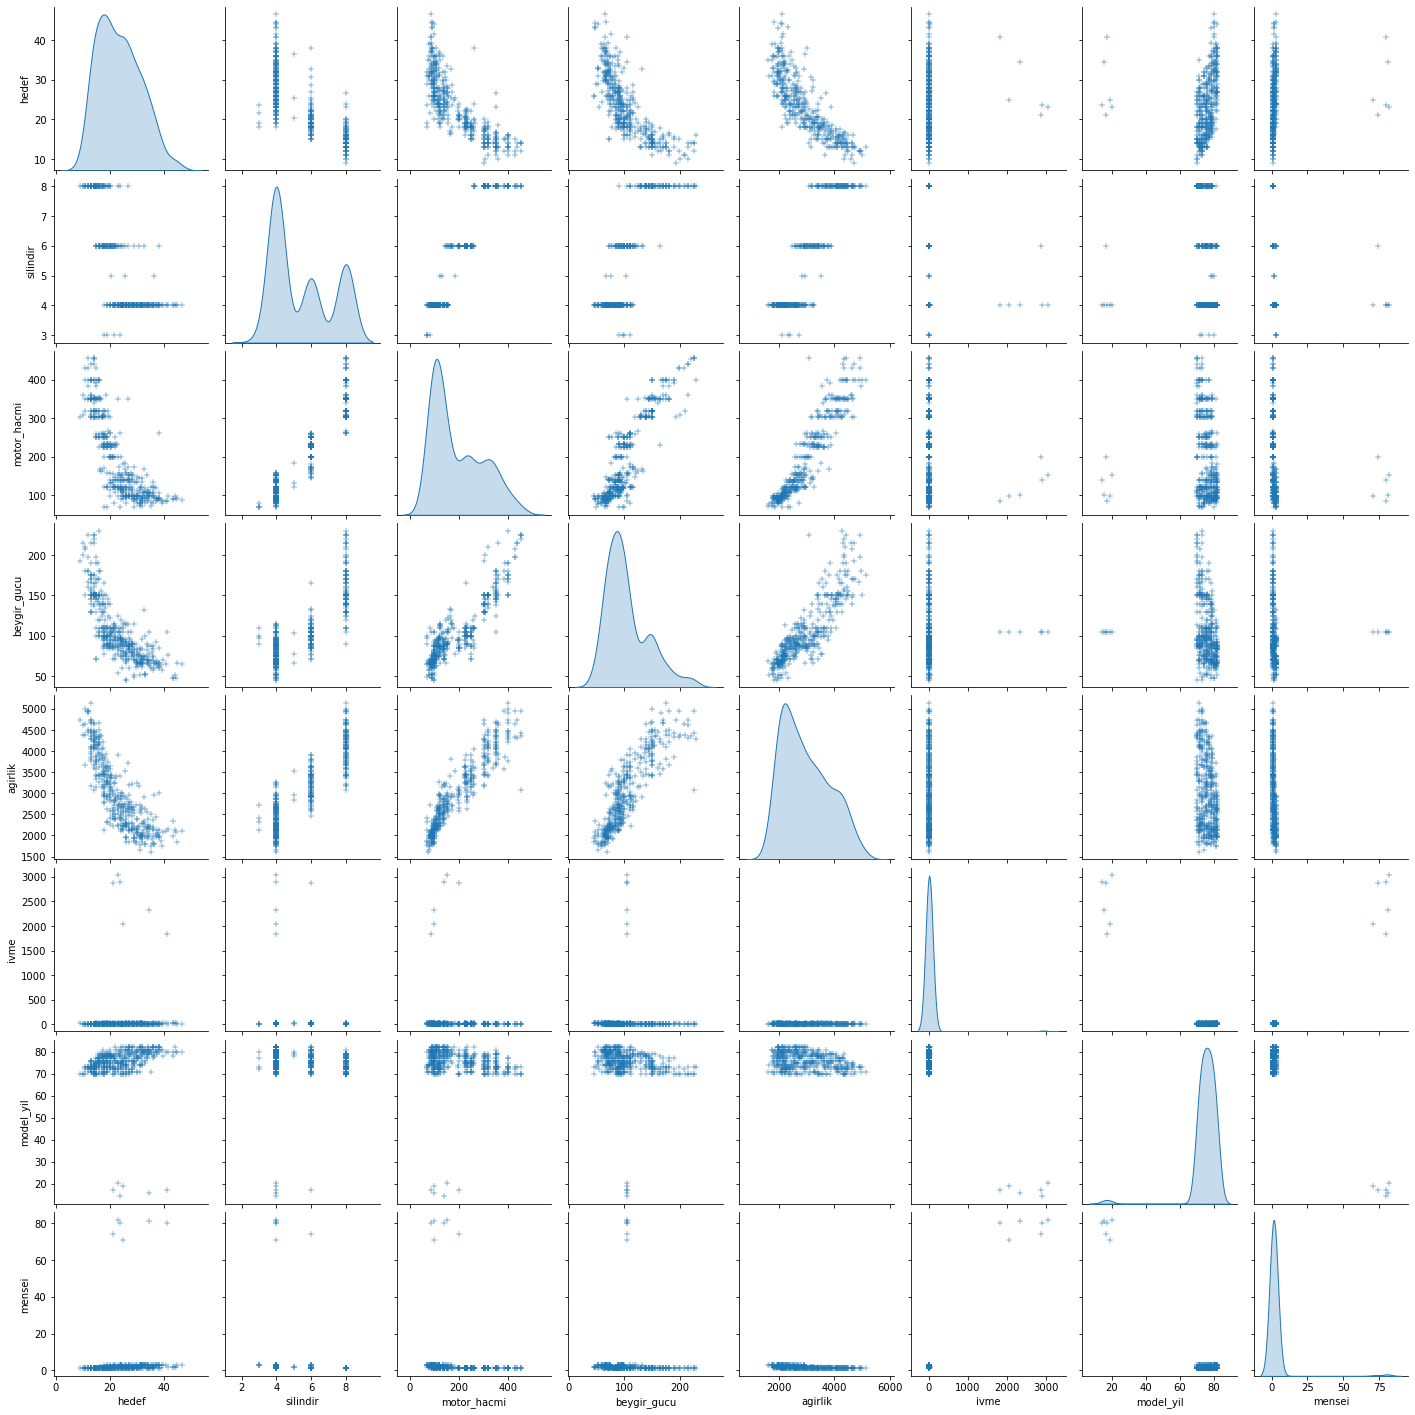

In [11]:
sns.pairplot(veri, diag_kind = "kde", markers = "+")
plt.show()

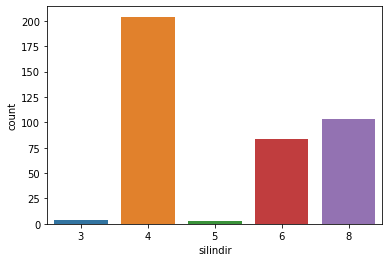

<bound method IndexOpsMixin.value_counts of 0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: silindir, Length: 398, dtype: int64>


In [12]:
plt.figure()
sns.countplot(veri["silindir"])
plt.show()
print(veri["silindir"].value_counts)

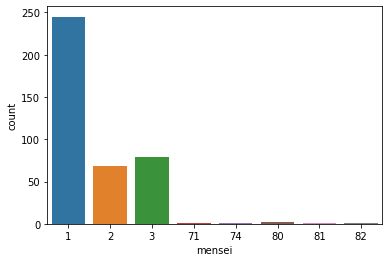

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: mensei, Length: 398, dtype: int64>


In [13]:
plt.figure()
sns.countplot(veri["mensei"])
plt.show()
print(veri["mensei"].value_counts)

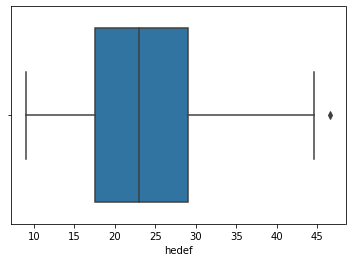

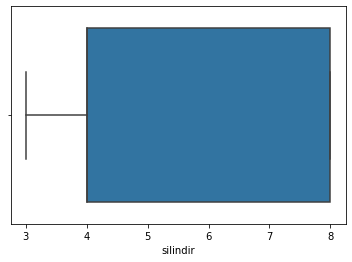

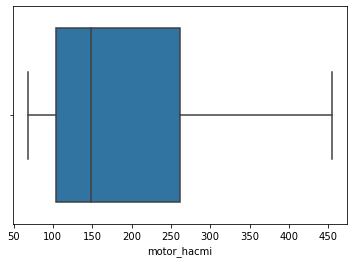

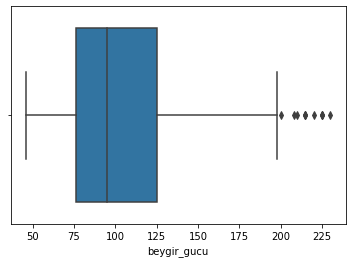

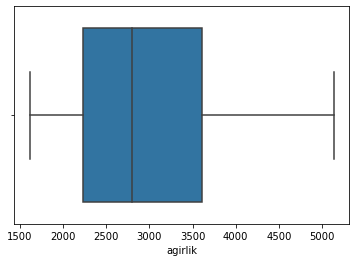

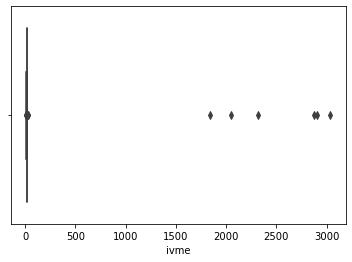

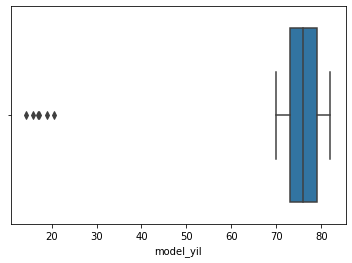

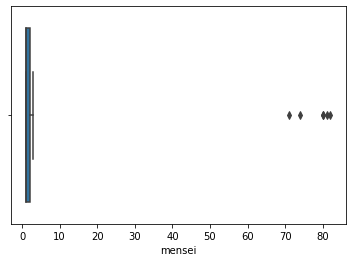

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 432x288 with 0 Axes>

In [43]:
for c in veri.columns:
    plt.figure()
    sns.boxplot(x = c, data = veri, orient = "v")
    plt.show()

In [14]:
tanim = veri.describe()
tanim

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei
count,398.000000,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2977.584184,53.035678,75.095226,2.728643
std,7.815984,1.701004,104.269838,38.199187,849.402560,308.689377,8.040681,9.371522
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,14.300000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2225.250000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3614.750000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,3035.000000,82.000000,82.000000


In [15]:
# beygir gücü
thr = 2
horsepower_desc = tanim["beygir_gucu"]
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr * IQR_hp
bottoom_limit_hp = q1_hp - thr * IQR_hp
filter_hp_bottom = bottoom_limit_hp < veri["beygir_gucu"]
filter_hp_top = veri["beygir_gucu"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top
veri = veri[filter_hp]

In [16]:
# ivme
acceleration_desc = tanim["ivme"]
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc -q1_acc
top_limit_acc = q3_acc + thr * IQR_acc
bottom_limit_acc = q1_acc - thr * IQR_acc
filter_acc_bottom = bottom_limit_acc < veri["ivme"]
filter_acc_top = veri["ivme"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top
veri = veri[filter_acc]

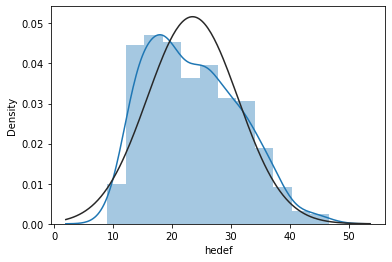

In [17]:
# hedef değişken dağılımı
plt.figure()
sns.distplot(veri.hedef, fit = norm)
plt.show()

In [18]:
# mu sigma
(mu, sigma) = norm.fit(veri["hedef"])
print("mu : {}, sigma = {}".format(mu, sigma))

mu : 23.480829015544042, sigma = 7.722025918554436


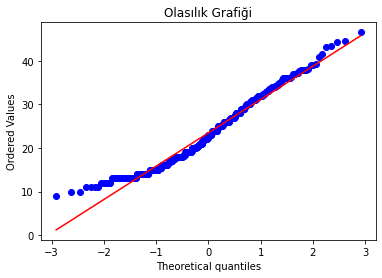

In [19]:
# qq plot
plt.figure()
stats.probplot(veri["hedef"], plot = plt)
plt.title("Olasılık Grafiği")
plt.show()

In [20]:
# log1p ile çarpıklığı azaltalım
veri["hedef"] = np.log1p(veri["hedef"])

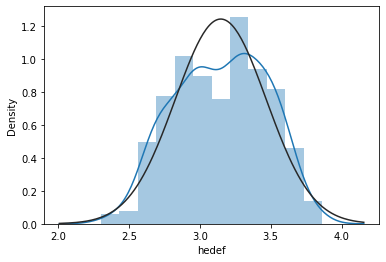

In [21]:
plt.figure()
sns.distplot(veri.hedef, fit = norm)
plt.show()

In [22]:
# Çarpıklığı düzeltilen hedef değişkenin mu ve sigma değeri
(mu, sigma) = norm.fit(veri["hedef"])
print("mu : {}, sigma = {}".format(mu, sigma))

mu : 3.1472576292750807, sigma = 0.3214270970987846


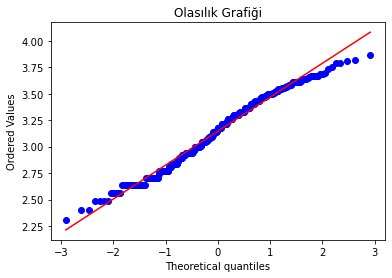

In [23]:
# qq plot
plt.figure()
stats.probplot(veri["hedef"], plot = plt)
plt.title("Olasılık Grafiği")
plt.show()

In [24]:
# veri seti içindeki diğer verilerin çarpıklıkları
carpik_ozellikler = veri.apply(lambda x: skew(x.dropna())).sort_values(ascending = True)
carpiklik = pd.DataFrame(carpik_ozellikler, columns = ["çarpık"])
carpiklik

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [25]:
# Öznitelik işlemleri
veri["silindir"] = veri["silindir"].astype(str)
veri["mensei"] = veri["mensei"].astype(str)
veri = pd.get_dummies(veri)

In [26]:
# bölünme x-y
x = veri.drop(["hedef"], axis = 1)
y = veri.hedef

In [27]:
# eğitim test bölünmesi
X_egitim, X_test, Y_egitim, Y_test = train_test_split(x, y, test_size = 0.9,)

In [28]:
# standardizasyon
scaler = RobustScaler()
X_egitim = scaler.fit_transform(X_egitim)
X_test = scaler.transform(X_test)

In [29]:
# doğrusal regresyon
lr = LinearRegression()
lr.fit(X_egitim, Y_egitim)
print("Doğrusal Regresyon Katsayıları : ", lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse_dogrusal = mean_squared_error(Y_test, y_predicted_dummy)
print("Doğrusal Regresyon Ortalama Kare Hatası : ", mse_dogrusal)

Doğrusal Regresyon Katsayıları :  [-1.59238477e-01 -3.21319242e-02 -3.30109913e-01  1.68716155e-02
  1.12353684e-01 -1.42448296e-01  9.58010756e-02 -1.66533454e-16
 -3.94471488e-02  8.60943694e-02  7.92027906e-02 -6.88087472e-02
 -1.03940434e-02 -1.94289029e-16 -1.11022302e-16  1.73472348e-17
 -1.38777878e-17 -1.84743277e-02 -4.16333634e-17  0.00000000e+00
 -3.81639165e-17  3.46944695e-17 -8.09304127e-02 -2.77555756e-17
 -1.89464330e-17 -8.32667268e-17 -2.77555756e-17 -5.96597953e-02
 -1.11022302e-16 -9.24777036e-02 -1.38777878e-17 -6.93889390e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.16333634e-17
  4.75922124e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.05119720e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.26666857e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0000

ridge Katsayıları :  [-0.07063945 -0.12265764 -0.1941703   0.01162246  0.13549864 -0.08892104
  0.12612961  0.         -0.06869161  0.03148303  0.03520569 -0.04503326
  0.00982757  0.          0.          0.          0.         -0.00842748
  0.          0.          0.          0.         -0.07474253  0.
  0.          0.          0.         -0.04338562  0.         -0.07887376
  0.          0.          0.          0.          0.          0.
  0.0209552   0.          0.          0.          0.          0.
 -0.00941329  0.          0.          0.          0.          0.
  0.          0.14073837  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.02794057  0.         -0.06153303
 -0.00384864  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.06514917  0.          0.
  0.          0.          0. 

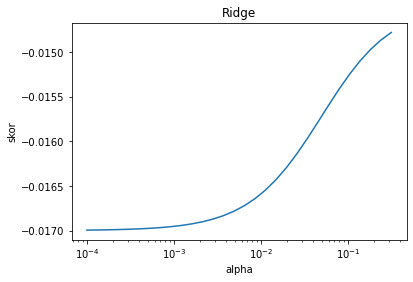

In [30]:
# ridge regresyon
ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{"alpha" : alphas}]
n_folds = 5
clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error")
clf.fit(X_egitim, Y_egitim)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print("ridge Katsayıları : ", clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge En iyi tahmin : ", ridge)
y_predicted_dummy = clf.predict(X_test)
mse_ridge = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge Ortalama Kare Hata : ", mse_ridge)
print(30*"-")
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("skor")
plt.title("Ridge")
plt.show()

Lasso Katsayıları :  [-0.         -0.12307892 -0.16693491  0.          0.14796056 -0.
  0.18150998  0.         -0.01185525  0.          0.         -0.
  0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.

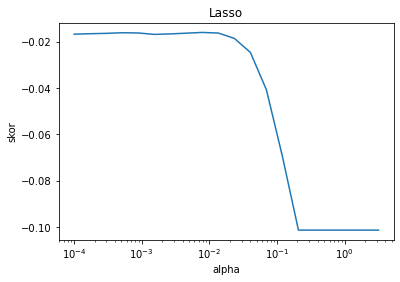

In [33]:
# lasso
lasso = Lasso(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4, 0.5, 20)
tuned_parameters = [{"alpha" : alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error")
clf.fit(X_egitim, Y_egitim)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print("Lasso Katsayıları : ", clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso en iyi tahminleyici : ", lasso)
y_predicted_dummy = clf.predict(X_test)
mse_lasso = mean_squared_error(Y_test, y_predicted_dummy)
print("Lasso ortalama kare hata : ",mse_lasso)
print(30*"-")
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("skor")
plt.title("Lasso")
plt.show()

In [37]:
# elastik ağ
parametersGrid = {"alpha" : alphas, "l1 Ratio" : np.arange(0.0, 1.0, 0.05)}
eNet = ElasticNet(random_state = 42, max_iter = 10000)
clf = GridSearchCV(eNet, parametersGrid, cv = n_folds, scoring = "neg_mean_squared_error")
clf.fit(X_egitim, Y_egitim)
print("Elstik Ağ katsayıları : ", clf.best_estimator_.coef_)
print("Elstik Ağ en iyi thminleyici : ", clf.best_estimator_)
y_predicted_dummy = clf.predict(X_test)
mse_elastik = mean_squared_error(Y_test, y_predicted_dummy)
print("Elastik ağ ortalam kare hata : ", mse_elastik)

ValueError: Invalid parameter l1 Ratio for estimator ElasticNet(alpha=0.0001, max_iter=10000, random_state=42). Check the list of available parameters with `estimator.get_params().keys()`.

In [38]:
langs = ["Doğrusal", "ridge", "Lasso", "Elastik Ağ"]
students = [mse_dogrusal, mse_ridge, mse_lasso, mse_elastik]
plt.bar(langs, students)
plt.title("Ortalama Kare Hatası")
plt.show()

NameError: name 'mse_elastik' is not defined